# Bandit Problem

In [124]:
# imports
from bandits import Bandit
import random
import matplotlib.pyplot as plt
import numpy as np
# Include your imports here, if any are used. 

A list of ten bandit objects initialized in the list...

In [125]:
# number of bandits = n
n = 10
# number of iterations = N
N = 1000
bandits = [Bandit(random.random()*4-2) for _ in range(n)]
bandit_mean = []
for bandit in bandits:
    bandit_mean.append(bandit.get_mean())
print(bandit_mean)

[1.4223708936337722, -1.9287152181163902, 1.1181421759387824, 0.9933132171340069, 0.364149321521281, 0.17636094011768222, -0.5036335663405942, 1.1786553026125137, 0.35670444360034503, 1.20467765117038]


In [126]:
bandits[0].pullLever()

0.655766421282899

## Greedy algorithm Implementation

In [127]:
def run_greedy():
    # TODO: Implement the greedy algorithm here
    # Return the reward from the bandits in a list
    bandit_rewards = [[] for i in range (n)]
    max_index = 0
    max_rew = -10000
    for i in range(n):
        x = bandits[i].pullLever()
        bandit_rewards[i].append(x)
        if max_rew<x:
            max_rew = x
            max_i = i
    for y in range(N-n):
        bandit_rewards[max_i].append(bandits[max_i].pullLever())
    return bandit_rewards

Plot the cumulative average of rewards as the number of iterations increases.

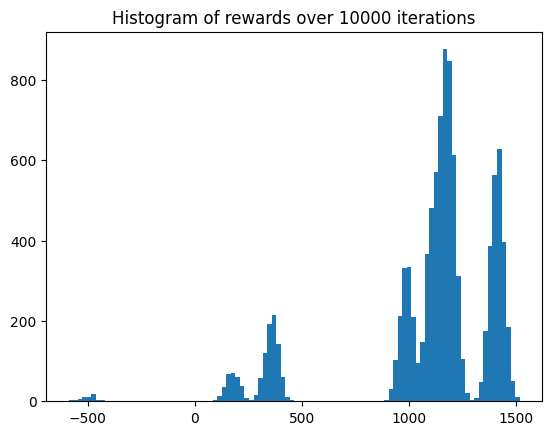

The average cumulative reward for 1000 lever pulls when averaged over 10000 iterations = 1097.3642807964156


In [128]:
cumulative_sum = []
#the number of iterations - itr
itr = 10000
for x in range (itr):
    bandit_rewards = run_greedy()
    sum_score = 0
    for bandit in bandit_rewards:
        for y in bandit:
            sum_score+=y
    cumulative_sum.append(sum_score)
plt.hist(cumulative_sum,bins = 100)
plt.title(f"Histogram of rewards over {itr} iterations")
plt.show()
sum_score = 0
for score in cumulative_sum:
    sum_score += score
avg = sum_score/itr
print(f'The average cumulative reward for 1000 lever pulls when averaged over {itr} iterations = {avg}')

In [129]:
optimal_reward= 1000*max(bandit_mean)
print(optimal_reward)
regret = optimal_reward - avg
print(regret)
print(f'Regret Percentage: {regret*100/optimal_reward} %')

1422.3708936337723
325.00661283735667
Regret Percentage: 22.84963888757965 %


## $\epsilon$-greedy Algorithm

In [130]:
def run_epsilon_greedy(epsilon):
    mean_score= [0 for i in range(n)]
    number_of_pulls = [0 for i in range(n)]
    for x in range(N):
        i = random.random()
        if i < epsilon:
            bandit_num = random.randint(0,n-1)
            mean_score[bandit_num] = (mean_score[bandit_num]*number_of_pulls[bandit_num] + bandits[bandit_num].pullLever())/(number_of_pulls[bandit_num]+1)
            number_of_pulls[bandit_num] +=1
        else:
            max_index= np.argmax(mean_score)
            bandit_num = max_index
            mean_score[bandit_num] = (mean_score[bandit_num]*number_of_pulls[bandit_num] + bandits[bandit_num].pullLever())/(number_of_pulls[bandit_num]+1)
            number_of_pulls[bandit_num] +=1
    cumulative_reward = 0
    for i in range(n):
        cumulative_reward += mean_score[i]*number_of_pulls[i]
    return cumulative_reward

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

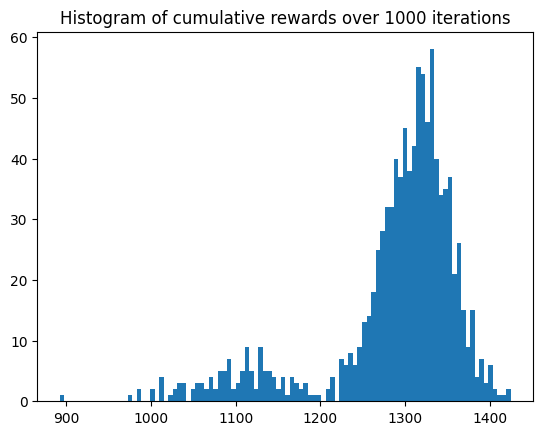

The average cumulative rewards when the e greedy algorithm is run for 1000 times for 1000 lever pulls each in each iteration = 1288.0356763801874


In [131]:
cumulative_sum = []
#the number of iterations - itr
itr = 1000
for x in range (itr):
    cumulative_sum.append(run_epsilon_greedy(0.1))
plt.hist(cumulative_sum,bins = 100)
plt.title(f"Histogram of cumulative rewards over {itr} iterations")
plt.show()
sum_score = 0
for score in cumulative_sum:
    sum_score += score
avg_epsilon = sum_score/itr
print(f'The average cumulative rewards when the e greedy algorithm is run for 1000 times for 1000 lever pulls each in each iteration = {avg_epsilon}')

In [132]:
regret_epsilon = optimal_reward - avg_epsilon
print(f'Regret = {regret_epsilon}')
print(f'Regret percentage for e = 0.1 is {regret_epsilon*100/optimal_reward} %')

Regret = 134.33521725358491
Regret percentage for e = 0.1 is 9.444457690665677 %


## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

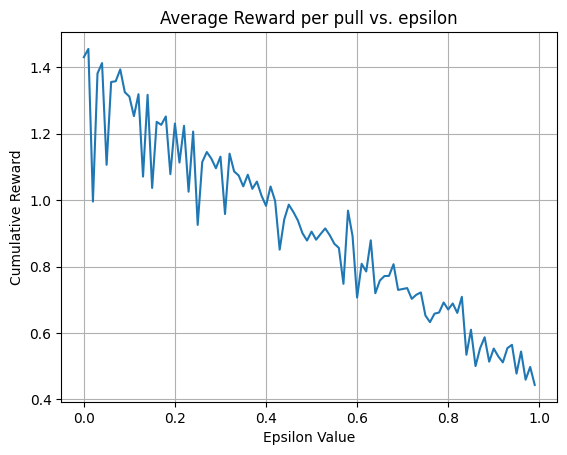

The reward is maximum at the value of epsilon 0.01


In [133]:
epsilon_values= [i/100 for i in range(100)]
cumulative_epsilon_sum = []
for val in epsilon_values:
    cumulative_epsilon_sum.append(run_epsilon_greedy(val))
avg_reward_per_pull = []
for val in cumulative_epsilon_sum:
    avg_reward_per_pull.append(val/N) 
plt.plot(epsilon_values, avg_reward_per_pull)
plt.xlabel("Epsilon Value")
plt.ylabel("Cumulative Reward")
plt.title("Average Reward per pull vs. epsilon")
plt.grid()
plt.show()
print(f'The reward is maximum at the value of epsilon {np.argmax(cumulative_epsilon_sum)/100}')

In [134]:
sum_e = 0
for i in range(100):
    epsilon_values= [i/100 for i in range(100)]
    cumulative_epsilon_sum = []
    for val in epsilon_values:
        cumulative_epsilon_sum.append(run_epsilon_greedy(val))
    sum_e += (np.argmax(cumulative_epsilon_sum)/100)
print(f'Optimal value of e is {sum_e/100}')
cumulative_reward = run_epsilon_greedy(sum_e/100)
print(f'Cumulative reward for the optimal e is {cumulative_reward}')
print(f'Regret percentage is {(optimal_reward - cumulative_reward)/optimal_reward*100}')

Optimal value of e is 0.013900000000000008
Cumulative reward for the optimal e is 1391.2515059454395
Regret percentage is 2.187853240502639


## Optimistic Initial Values

In [135]:
def run_optimistic_greedy(epsilon,q1,num_of_iterations):
    mean_score= [q1 for i in range(n)]
    number_of_pulls = [1 for i in range(n)]
    cumulative_reward = 0
    for x in range(num_of_iterations):
        i = random.random()
        if i < epsilon:
            bandit_num = random.randint(0,n-1)
            lever_val = bandits[bandit_num].pullLever()
            mean_score[bandit_num] = (mean_score[bandit_num]*number_of_pulls[bandit_num] + lever_val)/(number_of_pulls[bandit_num]+1)
            number_of_pulls[bandit_num] +=1
            cumulative_reward+=lever_val
        else:
            max_index= np.argmax(mean_score)
            bandit_num = max_index
            lever_val = bandits[bandit_num].pullLever()
            mean_score[bandit_num] = (mean_score[bandit_num]*number_of_pulls[bandit_num] + lever_val)/(number_of_pulls[bandit_num]+1)
            number_of_pulls[bandit_num] +=1
            cumulative_reward+=lever_val
    return cumulative_reward

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

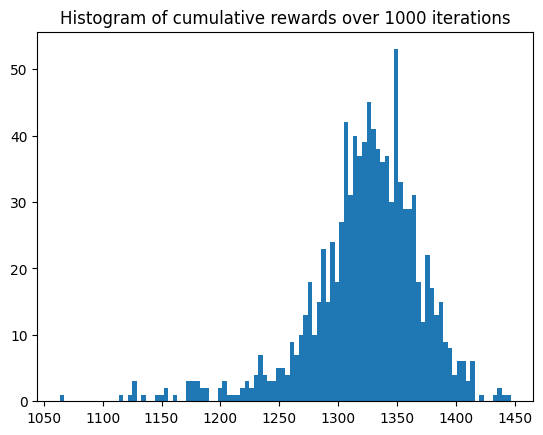

The average cumulative rewards for 1000 lever pulls when averaged over 1000 iterations 1323.6001648910926
Regret = 98.7707287426797
Regret = 6.94409096704357 %


In [136]:
cumulative_sum = []
#the number of iterations - itr
itr = 1000
for x in range (itr):
    cumulative_sum.append(run_optimistic_greedy(0,10,N))
plt.hist(cumulative_sum,bins = 100)
plt.title(f"Histogram of cumulative rewards over {itr} iterations")
plt.show()
sum_score = 0
for score in cumulative_sum:
    sum_score += score
avg_optimistic = sum_score/itr
print(f'The average cumulative rewards for {N} lever pulls when averaged over {itr} iterations {avg_optimistic}')
print(f'Regret = {optimal_reward - avg_optimistic}')
print(f'Regret = {(optimal_reward - avg_optimistic)/optimal_reward*100} %')

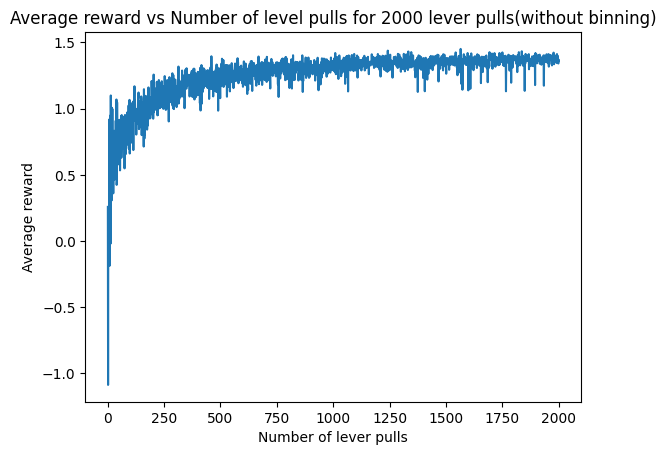

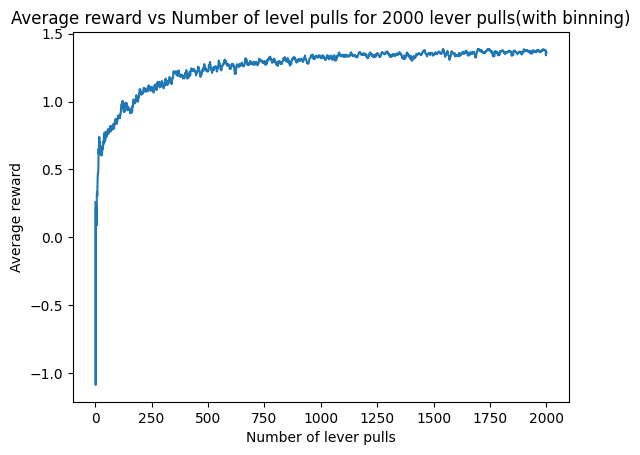

In [144]:
cumulative_avg = []
#the number of iterations - itr
itr =2000
for x in range (itr):
    cumulative_avg.append((run_optimistic_greedy(0,10,x+1))/(x+1))
binned_cumulative_avg = [0 for i in range (itr)]
for i in range(itr):
    if i>=4 and i<=itr-5:
        avg_sum = 0
        for j in range (-4,5):
            avg_sum +=cumulative_avg[i+j]
        binned_cumulative_avg[i] = avg_sum/9
    else:
        binned_cumulative_avg[i] = cumulative_avg[i]

plt.plot(np.linspace(1,itr,num =itr), cumulative_avg)
plt.title(f"Average reward vs Number of level pulls for {itr} lever pulls(without binning)")
plt.xlabel("Number of lever pulls")
plt.ylabel("Average reward")
plt.show()
plt.plot(np.linspace(1,itr,num =itr), binned_cumulative_avg)
plt.title(f"Average reward vs Number of level pulls for {itr} lever pulls(with binning)")
plt.xlabel("Number of lever pulls")
plt.ylabel("Average reward")
plt.show()

## Optional - Upper Confidence Bound (UCB)

In [140]:
def run_ucb(c):
    pass